<a href="https://colab.research.google.com/github/PEA-IA-DS-Proyecto-1/Project-2---name-still-to-find/blob/main/Projekt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projekt 2 - PEA AI-DS 24/25**

Mit diesem Notebook analysiere ich Yelp-Bewertungen und kombiniere die review.json-Datei mit der business.json-Datei, um Sternebewertungen und branchenspezifische Informationen zu verbinden.

1. Die Datensets wurden von der Yelp Homepage downgeloaded

In [ ]:
# Google Drive mit Colab verbinden
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Auflisten des Pfads indem sich die Datasets befinden (doublecheck)

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Projekt 2"


yelp_academic_dataset_business.json  yelp_academic_dataset_review.json


3 A) Laden der Bibliothek Pandas

3 B) Anweisung mitteilen wo sich das Dataset review.json befindet

3 C) Laden von 1 Million Einträge = Speicherfreundlich und Flexibler:

3 D) Größe des geladenen Teils des Datasets und Anzeigen der ersten Einträge

In [ ]:
import pandas as pd

# Pfad zur Datei
file_path = "/content/drive/My Drive/Colab Notebooks/Projekt 2/yelp_academic_dataset_review.json"

# 1 Million Zeilen laden
chunks = pd.read_json(file_path, lines=True, chunksize=1000000)
data = next(chunks)

# Anzeigen der Größe und der ersten Zeilen
print("Größe des geladenen Chunks:", len(data))
print(data.head())


Größe des geladenen Chunks: 1000000
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3 

4 A) Anweisung mitteilen wo sich das Dataset business.json befindet

4 B) Laden des Datasets

4 C) Anzeigen der Spalten mit den ersten Einträgen

In [ ]:
# Pfad zur Datei
business_path = "/content/drive/My Drive/Colab Notebooks/Projekt 2/yelp_academic_dataset_business.json"

# Laden der Datei
business_data = pd.read_json(business_path, lines=True)

# Anzeigen der ersten Zeilen und Auflistung der Spalten
print(business_data.head())
print("Spalten in business.json:", business_data.columns)


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

5. Zusammenfügen der beiden Datensets

In [ ]:
# Kombinieren der Daten anhand von business_id
merged_data = pd.merge(data, business_data, on='business_id', how='inner')

# Anzeigen der ersten Zeilen der kombinierten Daten
print(merged_data.head())
print("Spalten in den kombinierten Daten:", merged_data.columns)


                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars_x  useful  funny  cool  \
0        3       0      0     0   
1        5       1      0     1   
2        3       0      0     0   
3        5       1      0     1   
4        4       1      0     1   

                                                text                date  \
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30   
3  Wow!  Yummy, differ

6. Datenüberblick

In [ ]:
# Zeigen der Spalten und Datenstruktur
print(merged_data.info())

# Überblick über die ersten Zeilen
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   review_id     1000000 non-null  object        
 1   user_id       1000000 non-null  object        
 2   business_id   1000000 non-null  object        
 3   stars_x       1000000 non-null  int64         
 4   useful        1000000 non-null  int64         
 5   funny         1000000 non-null  int64         
 6   cool          1000000 non-null  int64         
 7   text          1000000 non-null  object        
 8   date          1000000 non-null  datetime64[ns]
 9   name          1000000 non-null  object        
 10  address       1000000 non-null  object        
 11  city          1000000 non-null  object        
 12  state         1000000 non-null  object        
 13  postal_code   1000000 non-null  object        
 14  latitude      1000000 non-null  float64       
 15 

7. Verteilung der Sternebewertung

<Axes: title={'center': 'Verteilung der Sternebewertungen'}, xlabel='stars_x'>

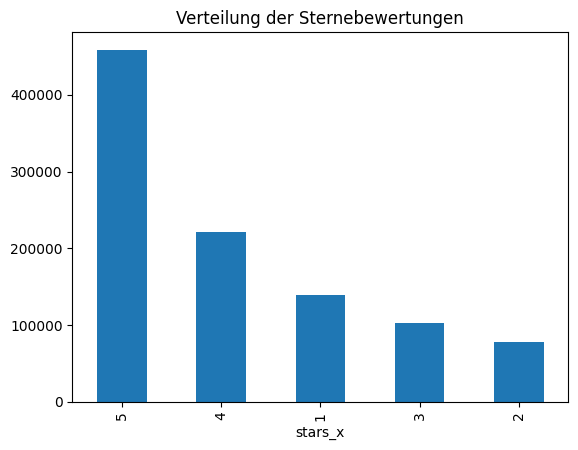

In [ ]:
# Verteilung der Sterne
merged_data['stars_x'].value_counts().plot(kind='bar', title="Verteilung der Sternebewertungen")


8. Welches Business wurde am häufigsten bewertet

In [ ]:
# Häufigste Kategorien
print(merged_data['categories'].value_counts().head(10))


categories
Restaurants, Mexican                                                                                                                  7915
Mexican, Restaurants                                                                                                                  6219
Restaurants, Pizza                                                                                                                    4760
German, Restaurants, Seafood, Cocktail Bars, French, Brasseries, American (New), Nightlife, Bars, Cajun/Creole, Breakfast & Brunch    4661
Restaurants, Italian                                                                                                                  4133
Pizza, Restaurants                                                                                                                    3925
Beauty & Spas, Nail Salons                                                                                                            3586
Restaurants, Chi

9. Länge der Textbewertungen

count    1000000.000000
mean         563.451724
std          520.728919
min            1.000000
25%          228.000000
50%          403.000000
75%          715.000000
max         5000.000000
Name: text_length, dtype: float64


<Axes: title={'center': 'Verteilung der Textlängen'}, ylabel='Frequency'>

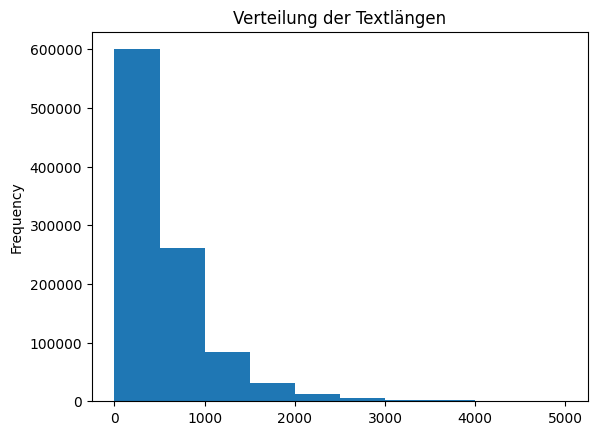

In [ ]:
# Textlängen berechnen
merged_data['text_length'] = merged_data['text'].apply(len)

# Statistik der Textlängen
print(merged_data['text_length'].describe())

# Textlängen visuell darstellen
merged_data['text_length'].plot(kind='hist', title="Verteilung der Textlängen")


10. Vereinheitlichung der Kategorien

In [ ]:
# Kategorien vereinheitlichen, leere Werte ignorieren, nur Listen verarbeiten
merged_data['categories_normalized'] = merged_data['categories'].dropna().str.lower().str.split(', ').apply(
    lambda x: ', '.join(sorted(x)) if isinstance(x, list) else x
)

# Vorschau der vereinheitlichten Kategorien
print(merged_data[['categories', 'categories_normalized']].head(10))


                                          categories  \
0  Restaurants, Breakfast & Brunch, Food, Juice B...   
1  Active Life, Cycling Classes, Trainers, Gyms, ...   
2                    Restaurants, Breakfast & Brunch   
3              Halal, Pakistani, Restaurants, Indian   
4  Sandwiches, Beer, Wine & Spirits, Bars, Food, ...   
5         Mediterranean, Restaurants, Seafood, Greek   
6  Supernatural Readings, Tours, Hotels & Travel,...   
7  Beer Bar, Bars, American (New), Gastropubs, Re...   
8                                 Parks, Active Life   
9     Steakhouses, Sushi Bars, Restaurants, Japanese   

                               categories_normalized  
0  american (new), breakfast & brunch, coffee & t...  
1  active life, cycling classes, fitness & instru...  
2                    breakfast & brunch, restaurants  
3              halal, indian, pakistani, restaurants  
4  american (traditional), bars, beer, food, nigh...  
5         greek, mediterranean, restaurants, seafood 

11. Häufigste Kategorien

In [ ]:
# Häufigste Kategorien berechnen und anzeigen
category_counts = merged_data['categories_normalized'].value_counts().head(10)
print(category_counts)


categories_normalized
mexican, restaurants                                                         14134
event planning & services, hotels, hotels & travel                           10675
pizza, restaurants                                                            8685
japanese, restaurants, sushi bars                                             8625
italian, restaurants                                                          7067
chinese, restaurants                                                          6266
beauty & spas, nail salons                                                    6028
italian, pizza, restaurants                                                   5564
event planning & services, hotels, hotels & travel, venues & event spaces     5424
coffee & tea, food                                                            5207
Name: count, dtype: int64


12. muss nochmals verfeinert werden

In [ ]:
# Alle Kategorien in einer Liste sammeln
from collections import Counter
all_categories = merged_data['categories_normalized'].dropna().str.split(', ').explode()

# Häufigste Schlagwörter zählen
category_keywords = Counter(all_categories)
print(category_keywords.most_common(10))


[('restaurants', 689501), ('food', 280910), ('nightlife', 227315), ('bars', 213643), ('american (new)', 147148), ('american (traditional)', 141726), ('breakfast & brunch', 135409), ('event planning & services', 94662), ('sandwiches', 92884), ('seafood', 82720)]


13. nach spezifischen Kategorien suchen


In [ ]:
# Spezifische Schlagwörter filtern
specific_keywords = ['japanese', 'mexican', 'pizza', 'steakhouses', 'indian', 'pakistani',
    'thai', 'korean', 'mediterranean', 'american (new)', 'american (traditional)', 'greek' ]
keyword_counts = {key: all_categories[all_categories == key].count() for key in specific_keywords}
print(keyword_counts)


{'japanese': 33078, 'mexican': 65286, 'pizza': 69007, 'steakhouses': 29268, 'indian': 13253, 'pakistani': 5252, 'thai': 17228, 'korean': 7766, 'mediterranean': 18608, 'american (new)': 147148, 'american (traditional)': 141726, 'greek': 12871}


14. visuelle Darstellung - Import der matplotlib Bibliothek

<ipython-input-15-0bb0b5f43e64>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=categories, palette="viridis", order=categories)


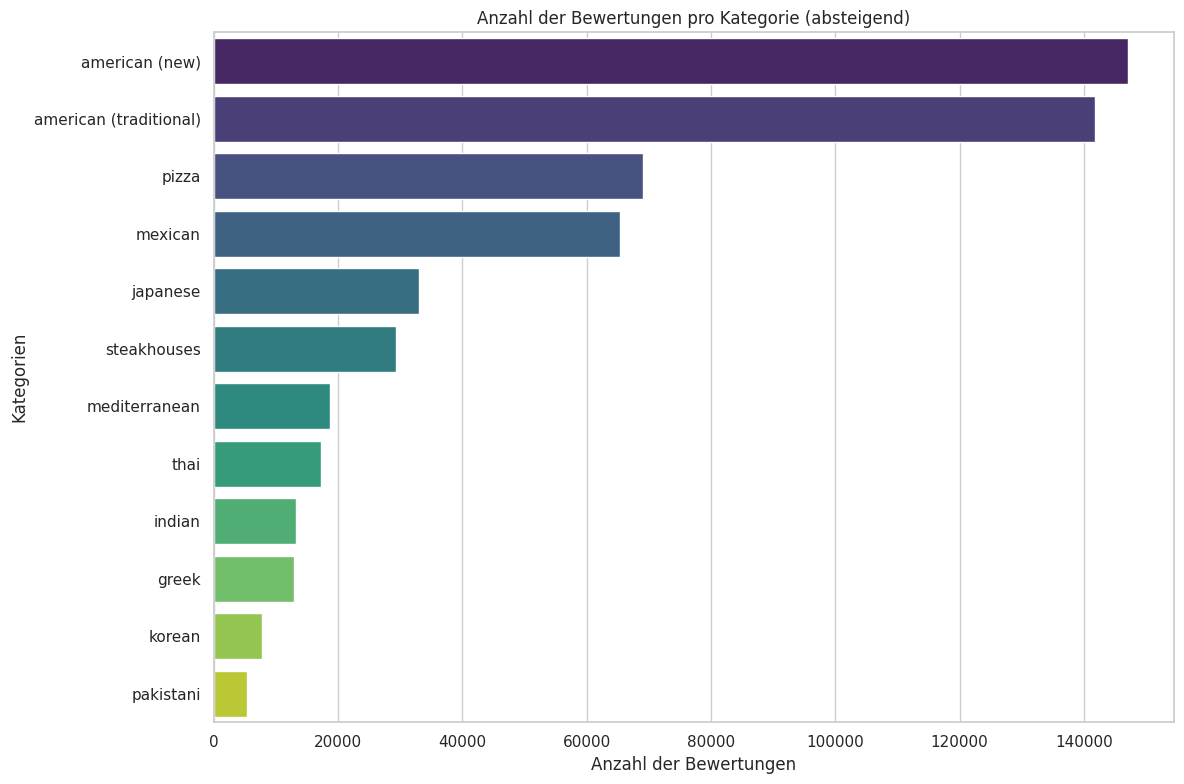

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn-Stil verwenden
sns.set(style="whitegrid")

# Daten nach Anzahl der Bewertungen sortieren
sorted_counts = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
categories = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

# Balkendiagramm mit Farben und Design
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=categories, palette="viridis", order=categories)
plt.xlabel('Anzahl der Bewertungen')
plt.ylabel('Kategorien')
plt.title('Anzahl der Bewertungen pro Kategorie (absteigend)')
plt.tight_layout()
plt.show()


15. Sternebewertung nach Kategorien

In [ ]:
import re

# Kategorienliste erweitern
categories_to_analyze = [
    'japanese', 'mexican', 'pizza', 'steakhouses', 'indian', 'pakistani',
    'thai', 'korean', 'mediterranean', 'american (new)', 'american (traditional)', 'greek'
]

# Bewertungen für diese Kategorien analysieren
category_reviews = merged_data[
    merged_data['categories_normalized'].str.contains('|'.join(re.escape(cat) for cat in categories_to_analyze), na=False)
]

# Durchschnittliche Sternebewertung pro Kategorie berechnen
for category in categories_to_analyze:
    avg_stars = category_reviews[
        category_reviews['categories_normalized'].str.contains(re.escape(category), na=False)
    ]['stars_x'].mean()
    print(f"Durchschnittliche Sternebewertung für {category}: {avg_stars}")


Durchschnittliche Sternebewertung für japanese: 3.8374145958038577
Durchschnittliche Sternebewertung für mexican: 3.7826053710160887
Durchschnittliche Sternebewertung für pizza: 3.6825684350862957
Durchschnittliche Sternebewertung für steakhouses: 3.6482164821648215
Durchschnittliche Sternebewertung für indian: 3.9822681656983323
Durchschnittliche Sternebewertung für pakistani: 3.8806169078446304
Durchschnittliche Sternebewertung für thai: 3.9611661739987247
Durchschnittliche Sternebewertung für korean: 3.986608292557301
Durchschnittliche Sternebewertung für mediterranean: 3.998925193465176
Durchschnittliche Sternebewertung für american (new): 3.850612988283905
Durchschnittliche Sternebewertung für american (traditional): 3.6901697641928792
Durchschnittliche Sternebewertung für greek: 3.9728847797373943


16. visuelle Darstellung

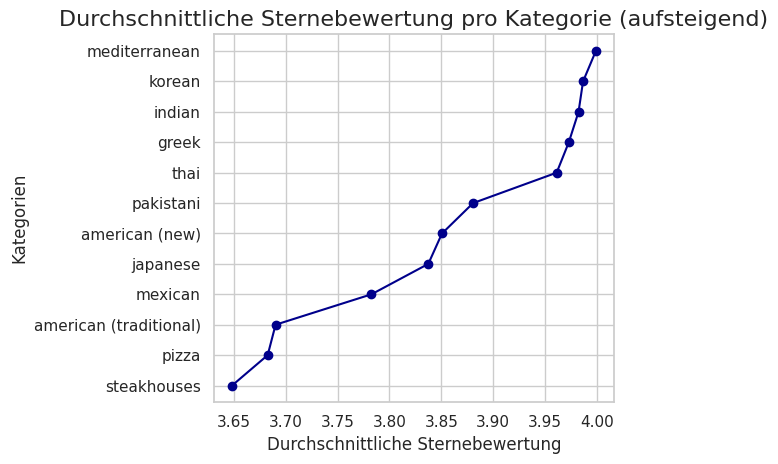

In [ ]:
import matplotlib.pyplot as plt

# Durchschnittliche Sternebewertungen in ein Dictionary speichern
average_stars = {}
for category in categories_to_analyze:
    avg_stars = category_reviews[
        category_reviews['categories_normalized'].str.contains(re.escape(category), na=False)
    ]['stars_x'].mean()
    average_stars[category] = avg_stars

# Daten sortieren
sorted_stars = sorted(average_stars.items(), key=lambda x: x[1], reverse=True)
categories = [item[0] for item in sorted_stars]
stars = [item[1] for item in sorted_stars]

# Punktdiagramm
plt.plot(stars, categories, 'o-', color='darkblue')
plt.xlabel('Durchschnittliche Sternebewertung')
plt.ylabel('Kategorien')
plt.title('Durchschnittliche Sternebewertung pro Kategorie (aufsteigend)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.gca().invert_yaxis()  # Y-Achse umkehren
plt.show()

17. Aufteilung der Sternenbewertung in 1 - 5

In [ ]:
# Verteilung der Sternebewertungen pro Kategorie erneut berechnen
ratings_distribution = {}

for category in categories_to_analyze:
    category_data = merged_data[merged_data['categories_normalized'].str.contains(re.escape(category), na=False, case=False)]
    if not category_data.empty:  # Nur Kategorien mit Daten hinzufügen
        star_counts = category_data['stars_x'].value_counts(normalize=True).sort_index()
        ratings_distribution[category] = star_counts

# In DataFrame umwandeln
distribution_df = pd.DataFrame(ratings_distribution).fillna(0).T
distribution_df.columns = ['1 Stern', '2 Sterne', '3 Sterne', '4 Sterne', '5 Sterne']

# Anzeigen der Verteilung
print(distribution_df)


                         1 Stern  2 Sterne  3 Sterne  4 Sterne  5 Sterne
japanese                0.102908  0.084558  0.122377  0.252524  0.437632
mexican                 0.119777  0.090200  0.112345  0.242996  0.434682
pizza                   0.142797  0.091846  0.113887  0.242932  0.408538
steakhouses             0.138718  0.105098  0.122830  0.235957  0.397396
indian                  0.096129  0.065042  0.098091  0.241907  0.498830
pakistani               0.105864  0.073115  0.108720  0.259139  0.453161
thai                    0.082768  0.075697  0.109198  0.262273  0.470063
korean                  0.071079  0.068890  0.122328  0.277749  0.459954
mediterranean           0.080449  0.071313  0.106836  0.251666  0.489736
american (new)          0.093593  0.086423  0.126492  0.262763  0.430730
american (traditional)  0.125573  0.095713  0.132537  0.255324  0.390853
greek                   0.077927  0.074120  0.110792  0.271463  0.465698


18. Visualisierung

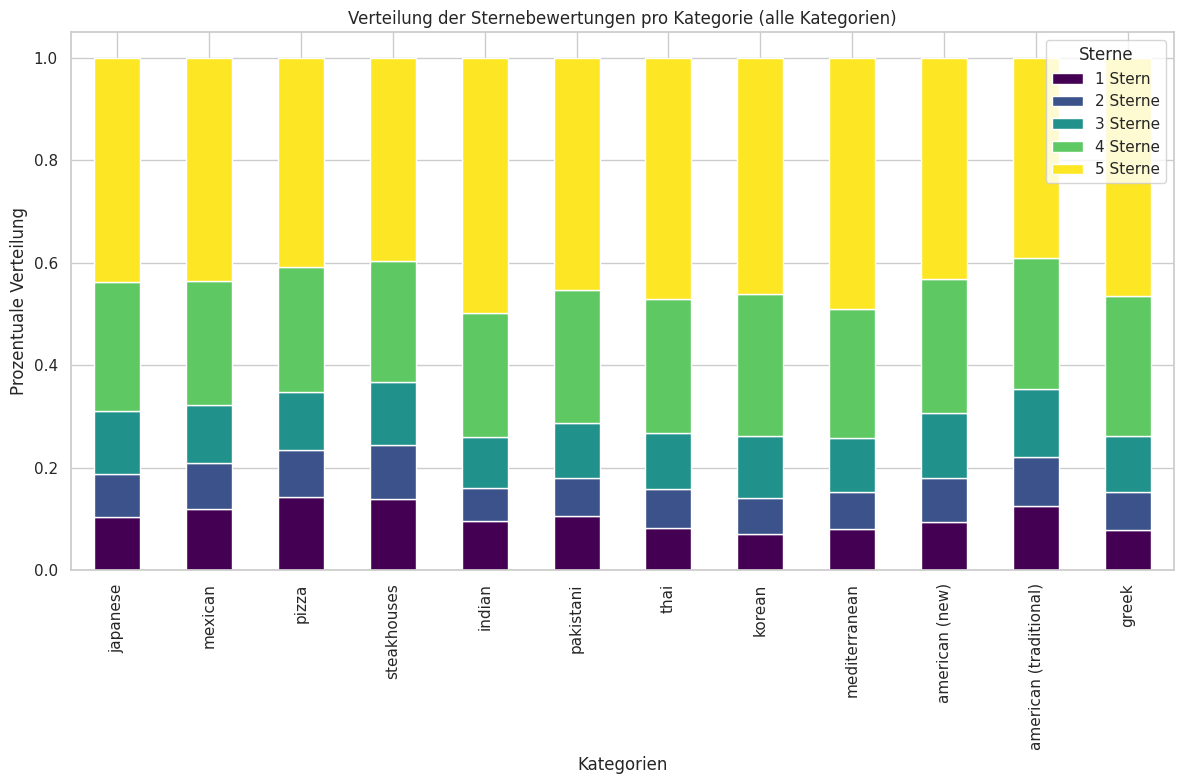

In [ ]:
# Gestapeltes Balkendiagramm
distribution_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Verteilung der Sternebewertungen pro Kategorie (alle Kategorien)')
plt.xlabel('Kategorien')
plt.ylabel('Prozentuale Verteilung')
plt.legend(title='Sterne')
plt.tight_layout()
plt.show()


19. Textanalyse

*    Positive und negative Bewertungen: Texte werden basierend auf Sternebewertungen in positive (4–5 Sterne) und negative (1–2 Sterne) Gruppen aufgeteilt
*    Häufigste Wörter: Mit CountVectorizer werden die häufigsten Wörter aus den Texten extrahiert

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Texte filtern (z. B. nur positive und negative Bewertungen)
positive_reviews = merged_data[merged_data['stars_x'] >= 4]['text']
negative_reviews = merged_data[merged_data['stars_x'] <= 2]['text']

# Funktion zur Wortanalyse
def get_top_words(texts, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    word_matrix = vectorizer.fit_transform(texts)
    word_counts = np.asarray(word_matrix.sum(axis=0)).flatten()
    word_indices = np.argsort(word_counts)[::-1][:n]
    top_words = [(vectorizer.get_feature_names_out()[i], word_counts[i]) for i in word_indices]
    return top_words

# Häufigste Wörter
print("Top-Wörter in positiven Bewertungen:")
print(get_top_words(positive_reviews, n=10))

print("\nTop-Wörter in negativen Bewertungen:")
print(get_top_words(negative_reviews, n=10))


Top-Wörter in positiven Bewertungen:
[('great', 380550), ('food', 326560), ('good', 324993), ('place', 313456), ('service', 198063), ('time', 189917), ('like', 176253), ('just', 173159), ('really', 155665), ('best', 147389)]

Top-Wörter in negativen Bewertungen:
[('food', 129849), ('just', 100997), ('place', 96254), ('service', 93604), ('time', 90963), ('like', 89505), ('good', 78276), ('said', 62266), ('order', 61589), ('don', 60001)]


20. Irrelevante Stopwörter einpflegen

In [ ]:
# Zusätzliche Stopwörter für negative Bewertungen
custom_negative_stop_words = ['did', 'ordered', 'came', 'just', 'good', 'like', 'said', 'don', 'got', 'didn', 'minutes', 'asked', 'went', 'really', 've'  ]
custom_positive_stop_words = ['just', 'really', 've' ]

# Funktion zur Wortanalyse mit spezifischen Stopwörtern
def get_top_words_refined(texts, n=10, extra_stop_words=None):
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

    # Erweiterte Stopwortliste
    all_stop_words = list(ENGLISH_STOP_WORDS) + (extra_stop_words if extra_stop_words else [])

    # CountVectorizer mit erweiterter Stopwortliste
    vectorizer = CountVectorizer(stop_words=all_stop_words, max_features=1000)
    word_matrix = vectorizer.fit_transform(texts)
    word_counts = np.asarray(word_matrix.sum(axis=0)).flatten()
    word_indices = np.argsort(word_counts)[::-1][:n]
    top_words = [(vectorizer.get_feature_names_out()[i], word_counts[i]) for i in word_indices]
    return top_words

# Häufigste Wörter berechnen
print("Top-Wörter in positiven Bewertungen (verfeinert):")
print(get_top_words_refined(positive_reviews, n=9, extra_stop_words=custom_positive_stop_words))

print("\nTop-Wörter in negativen Bewertungen (verfeinert):")
print(get_top_words_refined(negative_reviews, n=8, extra_stop_words=custom_negative_stop_words))


Top-Wörter in positiven Bewertungen (verfeinert):
[('great', 380550), ('food', 326560), ('good', 324993), ('place', 313456), ('service', 198063), ('time', 189917), ('like', 176253), ('best', 147389), ('delicious', 135050)]

Top-Wörter in negativen Bewertungen (verfeinert):
[('food', 129849), ('place', 96254), ('service', 93604), ('time', 90963), ('order', 61589), ('told', 59528), ('people', 42890), ('restaurant', 36941)]


21. Visualisierung

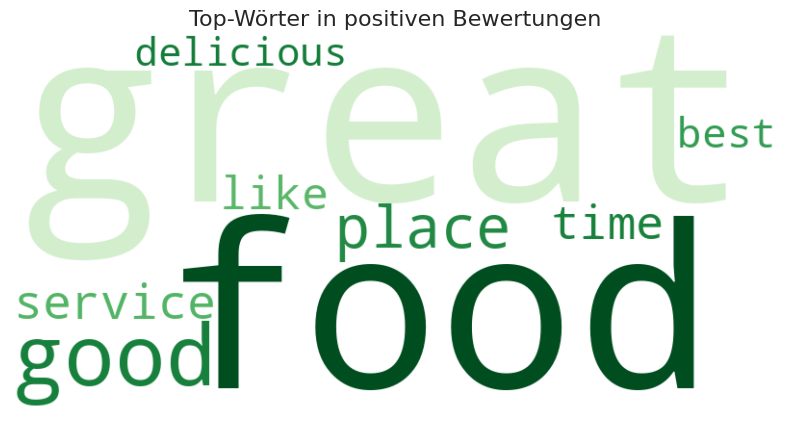

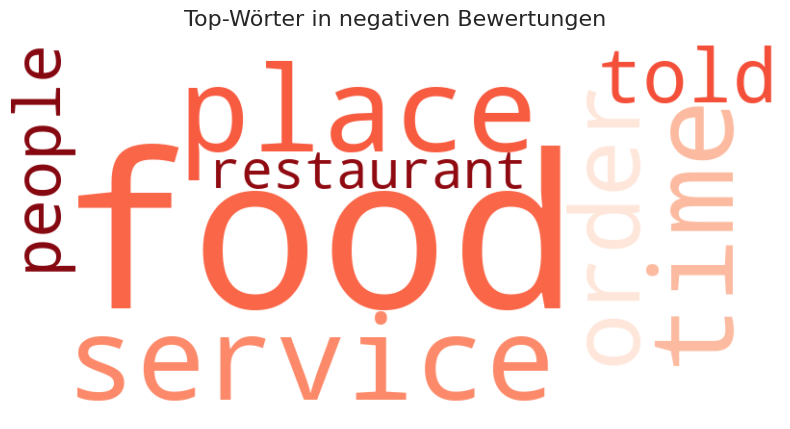

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Funktion zur Erstellung einer Wortwolke
def generate_wordcloud(words, frequencies, title, color):
    word_freq_dict = dict(zip(words, frequencies))  # Wörter und Frequenzen in ein Wörterbuch
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Positive Wörter und Frequenzen
positive_words = [word for word, _ in get_top_words_refined(positive_reviews, n=9, extra_stop_words=custom_positive_stop_words)]
positive_counts = [count for _, count in get_top_words_refined(positive_reviews, n=9, extra_stop_words=custom_positive_stop_words)]

# Negative Wörter und Frequenzen
negative_words = [word for word, _ in get_top_words_refined(negative_reviews, n=8, extra_stop_words=custom_negative_stop_words)]
negative_counts = [count for _, count in get_top_words_refined(negative_reviews, n=8, extra_stop_words=custom_negative_stop_words)]

# Wortwolke für positive Wörter
generate_wordcloud(positive_words, positive_counts, title="Top-Wörter in positiven Bewertungen", color="Greens")

# Wortwolke für negative Wörter
generate_wordcloud(negative_words, negative_counts, title="Top-Wörter in negativen Bewertungen", color="Reds")


Beginn Phase 2

Daten filtern gemäß Bewertungen

1-2 Sterne negativ - 4-5 positiv - 3 neutral (nicht berücksichtigen)

In [ ]:
# Daten filtern: Nur Bewertungen mit 1, 2, 4 und 5 Sternen behalten
filtered_data = merged_data[merged_data['stars_x'].isin([1, 2, 4, 5])]

# Prüfen, ob die Filterung funktioniert hat
print("Verteilung der Sterne nach Filterung:")
print(filtered_data['stars_x'].value_counts())


Verteilung der Sterne nach Filterung:
stars_x
5    458612
4    221897
1    138625
2     77912
Name: count, dtype: int64


Visualisierung

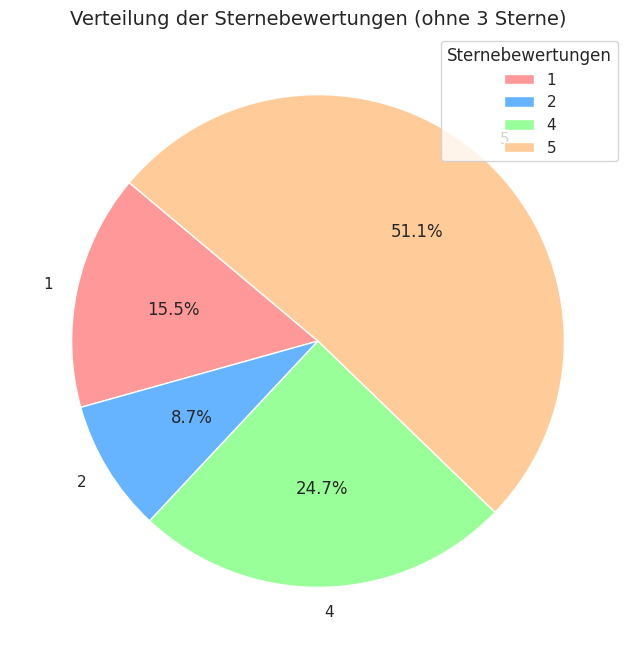

In [ ]:
import matplotlib.pyplot as plt

# Daten für das Kreisdiagramm
filtered_stars = merged_data[merged_data['stars_x'] != 3]['stars_x'].value_counts().sort_index()
labels = filtered_stars.index  # Labels automatisch generieren
sizes = filtered_stars.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Farben für 1, 2, 4, 5

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors
)

# Legende hinzufügen
plt.legend(patches, labels, title="Sternebewertungen", loc="upper right")
plt.title('Verteilung der Sternebewertungen (ohne 3 Sterne)', fontsize=14)
plt.show()


Umsetzung Klassifikation - neue Labelerstellung

1 = positive Bewertung

0 = negative Bewertung

label
1.0    680509
0.0    216537
Name: count, dtype: int64


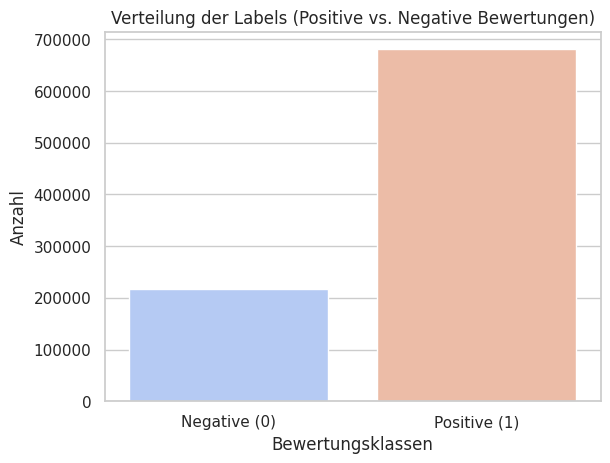

In [ ]:
# Neues Label für die Klassifikation erstellen
merged_data['label'] = merged_data['stars_x'].apply(
    lambda x: 1 if x in [4, 5] else (0 if x in [1, 2] else None)
)

# Filterung auf gültige Labels (ohne 3 Sterne)
filtered_data = merged_data[merged_data['label'].notnull()]

# Verteilung der Labels anzeigen
print(filtered_data['label'].value_counts())

# Visualisierung der Verteilung
import seaborn as sns
# Aktualisierte Visualisierung
sns.countplot(data=filtered_data, x='label', hue='label', palette='coolwarm', dodge=False)
plt.title('Verteilung der Labels (Positive vs. Negative Bewertungen)')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.xlabel('Bewertungsklassen')
plt.ylabel('Anzahl')
plt.legend([], [], frameon=False)  # Entfernt die doppelte Legende
plt.show()


Feature Auswahl - wird benötigt um präzise Texteinschätzungen vorzunehmen

In [ ]:
# Auswahl relevanter Features
selected_features = filtered_data[['text', 'text_length', 'stars_x', 'categories', 'label']]

# Wortanzahl berechnen und direkt dem Original hinzufügen
filtered_data.loc[:, 'word_count'] = filtered_data['text'].apply(lambda x: len(x.split()))
selected_features = filtered_data[['text', 'text_length', 'stars_x', 'categories', 'label', 'word_count']]

# Anzeige der ausgewählten Features
print("Ausgewählte Features:")
print(selected_features.head())


Ausgewählte Features:
                                                text  text_length  stars_x  \
1  I've taken a lot of spin classes over the year...          829        5   
3  Wow!  Yummy, different,  delicious.   Our favo...          243        5   
4  Cute interior and owner (?) gave us tour of up...          534        4   
5  I am a long term frequent customer of this est...          341        1   
6  Loved this tour! I grabbed a groupon and the p...          804        5   

                                          categories  label  word_count  
1  Active Life, Cycling Classes, Trainers, Gyms, ...    1.0         151  
3              Halal, Pakistani, Restaurants, Indian    1.0          40  
4  Sandwiches, Beer, Wine & Spirits, Bars, Food, ...    1.0          94  
5         Mediterranean, Restaurants, Seafood, Greek    0.0          65  
6  Supernatural Readings, Tours, Hotels & Travel,...    1.0         152  


Training des Modells

*   Datenaufteilung Training/Test
*   binäre Klassifikation durch logistische Regression
*   Training
*   Modellbewertung









In [ ]:
# Genauigkeit des Modells berechnen und ausgeben
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Modells: {accuracy:.2f}")


Genauigkeit des Modells: 0.76


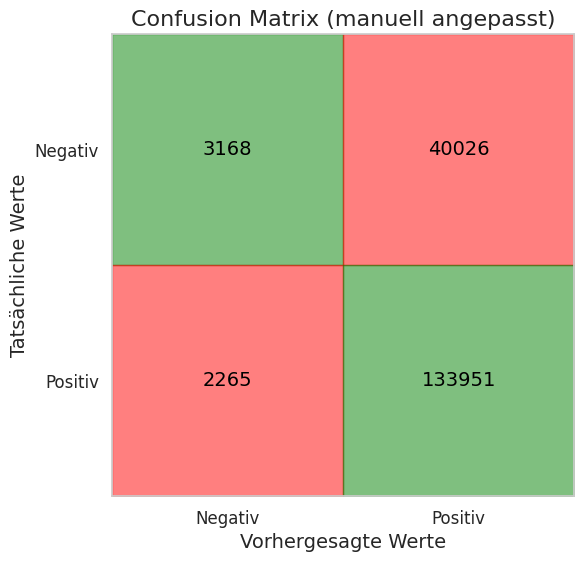

In [ ]:
import matplotlib.pyplot as plt

# Werte der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Farben für die Felder
colors = [['green', 'red'],  # Erste Zeile: Grün für korrekt, Rot für falsch
          ['red', 'green']]  # Zweite Zeile: Rot für falsch, Grün für korrekt

# Erstellen der Figur
plt.figure(figsize=(6, 6))
plt.title("Confusion Matrix (manuell angepasst)", fontsize=16)

# Manuelles Zeichnen der Felder
for i in range(2):  # Zeilen
    for j in range(2):  # Spalten
        plt.fill_between([j, j+1], [2-i]*2, [1-i]*2, color=colors[i][j], alpha=0.5)

# Beschriftung der Felder
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, 1.5 - i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=14, color='black')

# Achsen und Labels
plt.xticks([0.5, 1.5], ['Negativ', 'Positiv'], fontsize=12)
plt.yticks([1.5, 0.5], ['Negativ', 'Positiv'], fontsize=12)
plt.xlabel("Vorhergesagte Werte", fontsize=14)
plt.ylabel("Tatsächliche Werte", fontsize=14)
plt.gca().set_xlim(0, 2)
plt.gca().set_ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.show()


Klassifikationsbericht

In [ ]:
# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))


Klassifikationsbericht:
              precision    recall  f1-score   support

         0.0       0.58      0.07      0.13     43194
         1.0       0.77      0.98      0.86    136216

    accuracy                           0.76    179410
   macro avg       0.68      0.53      0.50    179410
weighted avg       0.72      0.76      0.69    179410



Dataset für Knime vorbereiten und auf Google Drive speichern

In [ ]:
from google.colab import drive
import pandas as pd

# 1. Pfad für die CSV-Datei
csv_file_path = "/content/drive/My Drive/Colab Notebooks/Projekt 2/filtered_data_knime.csv"

# 2. CSV-Datei erstellen
filtered_data.to_csv(csv_file_path, index=False)

# 3. Erfolgsnachricht
print(f"Die CSV-Datei wurde erfolgreich erstellt und gespeichert unter: {csv_file_path}")


Die CSV-Datei wurde erfolgreich erstellt und gespeichert unter: /content/drive/My Drive/Colab Notebooks/Projekt 2/filtered_data_knime.csv
